In [229]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from numpy.linalg import norm
%matplotlib inline

In [3]:
data = pd.read_csv("non_linear.csv")
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [5]:
def generate_degree(data_list:list, degree: int):
    return np.array([
        data_list**n for n in range(1, degree + 1)
    ]).T

In [68]:
degree = 8
X = generate_degree(data['x_train'], degree)

X.shape

(50, 8)

In [69]:
Y = data.y_train.values # для получения именно Numpy массива чисел
Y.shape

(50,)

In [70]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=10)

In [71]:
model = Ridge(alpha=0).fit(x_train, y_train)

C:\Users\naga3\miniconda3\envs\tf\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.9779e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [72]:
y_pred = model.predict(x_val)
y_pred_train = model.predict(x_train)
err_train = mean_squared_error(y_pred_train, y_train)
err_val = mean_squared_error(y_pred, y_val)
print("Ошибка на обучаемой выборке %.4f, \nОшибка на тестовой выборке %.4f "%(err_train, err_val))

Ошибка на обучаемой выборке 0.0521, 
Ошибка на тестовой выборке 0.1191 


Ошибка на обучаемой выборке 0.070, 
Ошибка на тестовой выборке 0.079 


<BarContainer object of 10 artists>

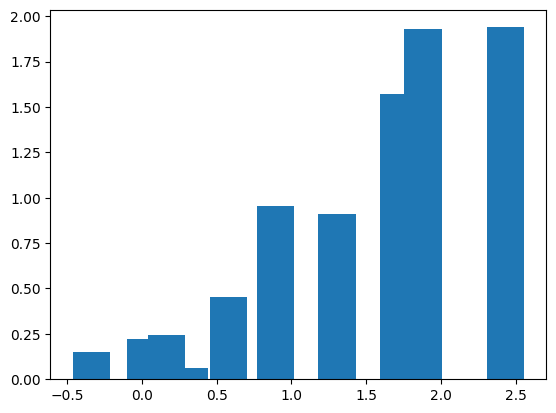

In [183]:
degree =8
X = generate_degree(data['x_train'], degree)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=10)
model = Ridge(alpha=0.8).fit(x_train, y_train)
y_pred = model.predict(x_val)
y_pred_train = model.predict(x_train)
err_train = mean_squared_error(y_pred_train, y_train)
err_val = mean_squared_error(y_pred, y_val)

print("Ошибка на обучаемой выборке %.3f, \nОшибка на тестовой выборке %.3f "%(err_train, err_val))
plt.bar(y_val, y_pred, 0.25)

Ошибка на обучаемой выборке 0.155, 
Ошибка на тестовой выборке 0.093 


C:\Users\naga3\miniconda3\envs\tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.713e+00, tolerance: 2.448e-03
  model = cd_fast.enet_coordinate_descent(


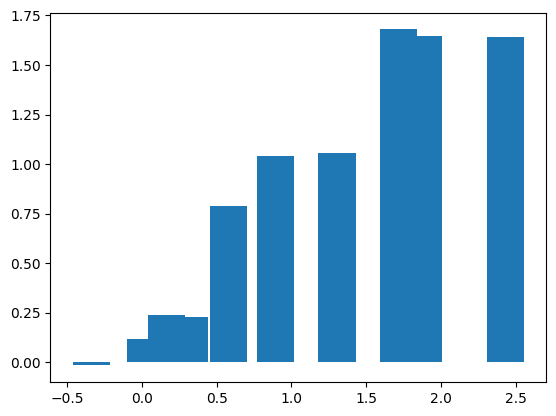

(array([[2., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]]),
 array([0.06307566, 0.25063827, 0.43820087, 0.62576348, 0.81332609,
        1.0008887 , 1.1884513 , 1.37601391, 1.56357652, 1.75113913,
        1.93870174]),
 array([-0.01592342,  0.153555  ,  0.32303343,  0.49251185,  0.66199028,
         0.8314687 ,  1.00094713,  1.17042555,  1.33990398,  1.50938241,
         1.67886083]),
 <matplotlib.collections.QuadMesh at 0x1a3783d8610>)

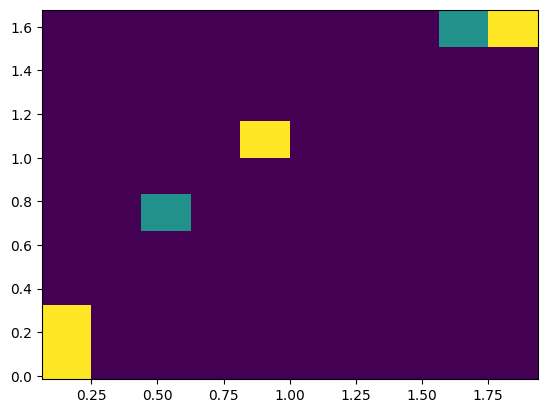

In [192]:
degree =8
X_1 = generate_degree(data['x_train'], degree)
x_train_1, x_val_1, y_train_1, y_val_1 = train_test_split(X_1, Y, test_size=0.2, random_state=10)
model_1 = Lasso(alpha=0.8).fit(x_train_1, y_train_1)
y_pred_1 = model_1.predict(x_val_1)
y_pred_train_1 = model_1.predict(x_train_1)
err_train_1 = mean_squared_error(y_pred_train_1, y_train_1)
err_val_1 = mean_squared_error(y_pred_1, y_val_1)

print("Ошибка на обучаемой выборке %.3f, \nОшибка на тестовой выборке %.3f "%(err_train_1, err_val_1))
plt.bar(y_val_1, y_pred_1, 0.25)
plt.show()
plt.hist2d(y_pred, y_pred_1)

In [236]:
degree =12

In [194]:
def generate_degree(data_list:list, degree: int):
    return np.array([
        data_list**n for n in range(1, degree + 1)
    ]).T

In [279]:
def train_polynomial(degree, data):
    """Генерим данные, тренируем модель  
    дополнительно рисуем график
    """
    X = generate_degree(data['x_train'], degree)
    y = data.y_train.values
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_pred_train = model.predict(X_train)
    error_valid = mean_squared_error(y_valid, y_pred)
    error_train = mean_squared_error(y_train, y_pred_train)
    print(
        "Степень полинома %d\nОшибка на валидации %.3f\nОшибка на обучении %.3f" %
        (degree, error_valid, error_train)
    )
    order_test = np.argsort(X_valid[:,0])
    plt.scatter(X_valid[:,0][order_test], y_valid[order_test], 40, 'r', 'o', alpha=0.8)
    
    print("Норма вектора весов \t||w|| = %.2f" % (norm(model.coef_)))
    # визуализируем решение
    x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num=100)
    y_linspace = model.predict(generate_degree(x_linspace, degree))
    plt.plot(x_linspace, y_linspace)
    
    return error_valid, error_train, norm(model.coef_)
    
degrees = []
valid_err = []
train_err = []
w_norm = []


Степень полинома 3
Ошибка на валидации 0.051
Ошибка на обучении 0.077
Норма вектора весов 	||w|| = 2.19


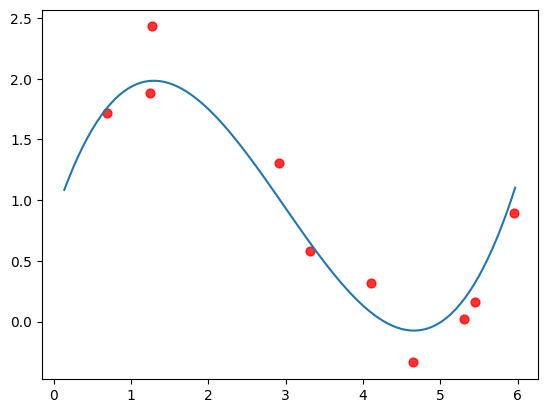

In [280]:
degree = 3
err_val, err_train, coef_norm = train_polynomial(degree, data)

degrees.append(degree)
valid_err.append(err_val)
train_err.append(err_train)
w_norm.append(coef_norm)

In [228]:
np.argsort(x_val[:,0])

array([6, 9, 8, 5, 1, 7, 0, 3, 2, 4], dtype=int64)